# 1. Задание

<ul>
    <li>Выберите набор данных (датасет) для решения задачи классификации или регрессии.</li>
<li>В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.</li>
    <li>С использованием метода train_test_split разделите выборку на обучающую и тестовую.</li>
<li>Обучите следующие модели:
одну из линейных моделей;
SVM;
    дерево решений.</li>
<li>Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.</li>
<li>Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.</li>
<li>Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.</li>
</ul>

# 2. Подготовка данных

Выбранный набор данных представляет из себя набор характеристик различных автомобилей, целевой переменной является - цена автомобиля

In [12]:
import pandas as pd

df = pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбцов.'.format(row_number, column_number))

Данный датасет содержит 205 строк и 26 столбцов.


In [15]:
null_flag = False
null_columns = {}
for col in df.columns:
    null_count = df[df[col].isnull()].shape[0]
    if null_count > 0:
        null_flag = True
        column_type = df[col].dtype
        null_columns[col] = column_type
        percent = round((null_count / row_number) * 100, 3)
        print('{} - {} - {}. Тип - {}'.format(col, null_count, percent, column_type))
        
if not null_flag:
    print('Пропуски в данных отсутствуют.')

Пропуски в данных отсутствуют.


In [17]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [19]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

In [73]:
from sklearn.model_selection import train_test_split

df_x = df.loc[:, df.columns != 'price']
df_y = df['price']
train_x_df, test_x_df, train_y_df, test_y_df = train_test_split(df_x,df_y,
                                     test_size=0.3, random_state=1)

In [43]:
row_number_train = train_x_df.shape[0]
column_number_train = train_x_df.shape[1]

print('Тренировочный датасет содержит {} строки и {} столбцов.'.format(row_number_train, column_number_train))

Тренировочный датасет содержит 143 строки и 25 столбцов.


In [42]:
row_number_test = test_x_df.shape[0]
column_number_test = test_x_df.shape[1]

print('Тестовый датасет содержит {} строки и {} столбцов.'.format(row_number_test, column_number_test))

Тестовый датасет содержит 62 строки и 25 столбцов.


# 3. Обучение моделей

## 3.1 Линейная модель 

### 3.1.1 Матрица корреляции

In [38]:
corr_matrix = df.corr()
corr_matrix

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.162792,...,0.028107,0.204898,0.271661,-0.175206,0.175895,-0.003477,-0.217333,0.033055,0.022503,0.012452
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.535721,...,-0.102395,0.091163,-0.129044,-0.018198,-0.053801,0.054142,0.275404,-0.049180,0.019534,-0.089579
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.051429,...,-0.090497,0.123845,0.201561,-0.205093,0.168305,-0.095958,-0.149881,0.111351,0.116787,-0.096100
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.296072,...,-0.126387,0.041529,-0.043657,-0.302867,-0.634479,0.160982,0.487600,-0.257728,-0.173238,-0.140119
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.246290,...,0.197266,0.288086,0.210910,0.223521,-0.143321,0.307844,-0.181173,-0.204284,-0.264490,0.307676
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.466657,...,-0.036787,0.015519,-0.117787,0.004591,-0.058337,0.092022,0.239094,-0.005580,0.021068,-0.115160
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.406223,...,-0.069157,-0.065079,0.011549,-0.006797,0.039211,-0.137122,-0.111408,0.039518,-0.002510,0.006444
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.441048,...,0.578458,0.424686,0.474585,0.062676,0.109677,0.553410,-0.065607,-0.461309,-0.468887,0.600088
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.170972,...,0.217967,0.105971,0.184332,-0.159755,0.101156,0.252744,0.200105,-0.158795,-0.108853,0.200113
wheelbase,0.162792,-0.535721,0.051429,-0.296072,0.246290,-0.466657,0.406223,0.441048,-0.170972,1.000000,...,0.607917,0.445035,0.519902,0.192395,-0.027569,0.468176,-0.344842,-0.494659,-0.556040,0.685544


In [37]:
corr_matrix['price'].nlargest(4)

price         1.000000
curbweight    0.905891
horsepower    0.846130
enginesize    0.818392
Name: price, dtype: float64

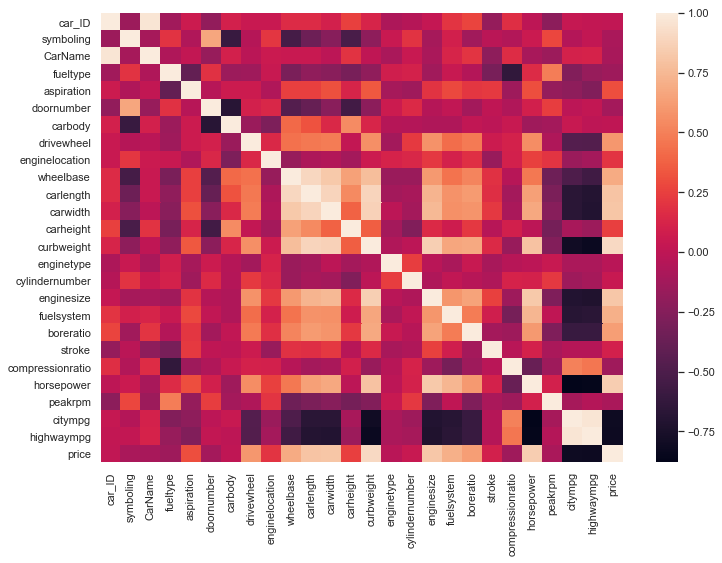

In [27]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr_matrix)

In [32]:
import plotly.express as px
fig = px.scatter(df, x='price', y='curbweight')
fig.show()

In [33]:
fig = px.scatter(df, x='price', y='horsepower')
fig.show()

In [39]:
fig = px.scatter(df, x='price', y='enginesize')
fig.show()

### 3.1.2 Вычисление коэффициентов регрессии матричным способом 

<img src="reg_m.jpg">

In [40]:
import numpy as np

In [110]:
X_0 = np.ones(row_number_train).T
X = np.column_stack((X_0, train_x_df))
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),train_y_df)
B

array([ 5.24106398e+01, -1.02311681e-01,  2.18470564e+00, -2.11642101e-02,
       -2.92692816e+01, -5.83570818e+00, -7.93128553e+00, -4.40863223e+00,
        2.52699519e+00,  3.20434750e+01,  6.34225165e-01, -2.06578965e-01,
        7.36209558e-01,  2.50456405e-01,  3.60955023e-01,  9.91672740e-01,
        4.48711749e-01, -4.77936652e-01,  3.58618089e+00, -2.09333506e-01,
       -5.03714418e-01,  5.71833312e-01,  1.43046552e+00, -1.12281838e-01,
       -2.40925647e+00,  1.50738855e+00])

### 3.1.3 Использование класса LinearRegression библиотеки scikit-learn

#### 3.1.3.1 Обучение c произвольным гиперпараметром

In [194]:
from sklearn.linear_model import Lasso
reg1 = Lasso(alpha=0.1).fit(np.array(train_x_df), 
                              np.array(train_y_df).reshape(-1, 1))
B_1 = (reg1.intercept_, reg1.coef_)

In [195]:
B_1

(array([42.14887115]),
 array([-1.11567509e-01,  1.84913331e+00, -1.05906495e-02, -2.01892043e+01,
        -6.63162812e-01, -7.31529743e+00, -4.77816533e+00,  1.83023531e+00,
         2.38949769e+01,  6.35998365e-01, -2.13153098e-01,  6.59254648e-01,
         2.64508407e-01,  3.75002489e-01,  9.35438073e-01,  4.13292452e-01,
        -2.53813867e-01,  3.67533788e+00, -1.76396306e-01, -4.98128698e-01,
         8.44526642e-01,  1.25702856e+00, -1.09337548e-02, -2.55377484e+00,
         1.55622583e+00]))

#### 3.1.3.2 Оценка качества модели 

In [196]:
predicted_y_reg = reg1.predict(np.array(test_x_df))

In [197]:
predict_test_df = pd.DataFrame(test_y_df)
predict_test_df['predicted_y'] = predicted_y

In [198]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(predict_test_df['predicted_y'].shape[0]), 
                         y=predict_test_df['predicted_y'],
                         name='predicted'
             ))

fig.add_trace(go.Scatter(x=np.arange(predict_test_df['predicted_y'].shape[0]), 
                         y=predict_test_df['price'],
                         name='test'
                        ))

fig.show()

In [199]:
from sklearn.metrics import r2_score

r2_reg = round(r2_score(test_y_df, predicted_y_reg), 2)

print('Коэффициент детерминации - %.2f' % r2_reg)

Коэффициент детерминации - 0.88


#### 3.1.3.3 Подбор гиперпараметра 

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

n_range = np.arange(0.1, 1.2, 0.1)
tuned_parameters = [{'alpha': n_range}]

gs = GridSearchCV(Lasso(),
                      param_grid=tuned_parameters,
                      cv=RepeatedKFold(n_splits=3, n_repeats=2), 
                      scoring='r2')
gs.fit(train_x_df, train_y_df)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=3, random_state=None),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

#### 3.1.3.4 Обучение с наилучшим гиперпараметром

In [210]:
gs.best_estimator_.fit(train_x_df, train_y_df)
predicted_y_best_reg = gs.best_estimator_.predict(test_x_df)

In [211]:
r2_reg_best = round(r2_score(test_y_df, predicted_y_best_reg), 2)

print('Коэффициент детерминации при случайном гиперпараметре - %.2f' 
      % r2_reg)
print('Коэффициент детерминации при наилучшем гиперпараметре - %.2f' 
      % r2_reg_best)

Коэффициент детерминации при случайном гиперпараметре - 0.88
Коэффициент детерминации при наилучшем гиперпараметре - 0.89


## 3.2 SVM

### 3.2.1 Обучение c произвольным гиперпараметром

In [156]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=100)

svr.fit(train_x_df, train_y_df)

predicted_y_svr = svr.predict(test_x_df)

### 3.2.2 Оценка качества модели 

In [162]:
r2 = round(r2_score(test_y_df, predicted_y_svr), 2)

print('Коэффициент детерминации - %.2f' % r2)

Коэффициент детерминации - 0.87


### 3.2.3 Подбор гиперпараметра 

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

n_range = np.arange(0.1,1,0.1)
tuned_parameters = [{'C': n_range}]

gs = GridSearchCV(SVR(kernel='linear'),
                      param_grid=tuned_parameters,
                      cv=RepeatedKFold(n_splits=3, n_repeats=2), 
                      scoring='r2')
gs.fit(train_x_df, train_y_df)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=3, random_state=None),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [159]:
'Наилучшее значение параметра с - ' + str(gs.best_params_['C'])

'Наилучшее значение параметра с - 0.9'

### 3.2.4 Обучение с наилучшим гиперпараметром 

In [160]:
gs.best_estimator_.fit(train_x_df, train_y_df)
predicted_y_best_svr = gs.best_estimator_.predict(test_x_df)

In [164]:
r2_best = round(r2_score(test_y_df, predicted_y_best_svr), 2)

print('Коэффициент детерминации при случайном гиперпараметре - %.2f' % r2)
print('Коэффициент детерминации при наилучшем гиперпараметре - %.2f' % r2_best)

Коэффициент детерминации при случайном гиперпараметре - 0.87
Коэффициент детерминации при наилучшем гиперпараметре - 0.88


## 3.3 Дерево решений 

### 3.3.1 Обучение c произвольным гиперпараметром 

In [166]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=1).fit(train_x_df, 
                                                train_y_df)
predict_y_dtr = dtr.predict(test_x_df)

### 3.3.2 Оценка качества модели 

In [167]:
r2_dtr = round(r2_score(test_y_df, predict_y_dtr), 2)

print('Коэффициент детерминации при случайном гиперпараметре - %.2f' % r2_dtr)

Коэффициент детерминации при случайном гиперпараметре - 0.80


### 3.3.3 Подбор гиперпараметра  

In [168]:
params = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                    param_grid=params, scoring='r2', cv=3, n_jobs=-1)

grid.fit(train_x_df, train_y_df)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             pre_dispatc

In [170]:
for param in params.keys():
    print('Наилучшее значение параметра %s - ' % param + str(grid.best_params_[param]))

Наилучшее значение параметра max_depth - 6
Наилучшее значение параметра min_samples_leaf - 0.04
Наилучшее значение параметра max_features - 0.2


### 3.2.4 Обучение с наилучшим гиперпараметром 

In [171]:
grid.best_estimator_.fit(train_x_df, train_y_df)
predicted_y_best_dtr = grid.best_estimator_.predict(test_x_df)

In [172]:
r2_best_dtr = round(r2_score(test_y_df, predicted_y_best_svr), 2)

print('Коэффициент детерминации при случайном гиперпараметре - %.2f' % 
      r2_dtr)
print('Коэффициент детерминации при наилучшем гиперпараметре - %.2f' % 
      r2_best_dtr)

Коэффициент детерминации при случайном гиперпараметре - 0.80
Коэффициент детерминации при наилучшем гиперпараметре - 0.88
